# **Importación de datos**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# **1. Análisis de facturación**

In [40]:
suma_precio_tienda = tienda['Precio'].sum()
print(f"La suma total de la columna precio para la Tienda 1 es: {suma_precio_tienda}")

La suma total de la columna precio para la Tienda 1 es: 1150880400.0


In [41]:
suma_precio_tienda2 = tienda2['Precio'].sum()
print(f"La suma total de la columna precio para la Tienda 2 es: {suma_precio_tienda2}")

La suma total de la columna precio para la Tienda 2 es: 1116343500.0


In [42]:
suma_precio_tienda3 = tienda3['Precio'].sum()
print(f"La suma total de la columna precio para la Tienda 3 es: {suma_precio_tienda3}")

La suma total de la columna precio para la Tienda 3 es: 1098019600.0


In [43]:
suma_precio_tienda4 = tienda4['Precio'].sum()
print(f"La suma total de la columna precio para la Tienda 4 es: {suma_precio_tienda4}")

La suma total de la columna precio para la Tienda 4 es: 1038375700.0


## **Analisis Grafico**

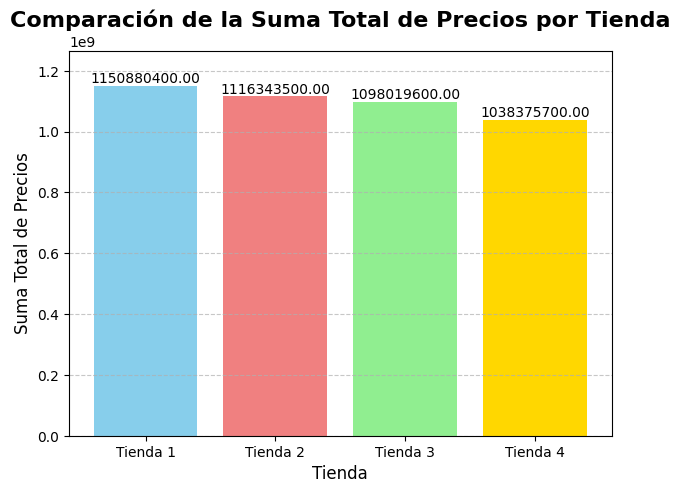

In [44]:
valores = [
    suma_precio_tienda,
    suma_precio_tienda2,
    suma_precio_tienda3,
    suma_precio_tienda4
]
etiquetas_tiendas = [
    'Tienda 1',
    'Tienda 2',
    'Tienda 3',
    'Tienda 4'
]

plt.figure(figsize=(7, 5))
barras = plt.bar(etiquetas_tiendas, valores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])


plt.title('Comparación de la Suma Total de Precios por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Suma Total de Precios', fontsize=12)

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 10, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(valores) * 1.1)

plt.show()

# **2. Ventas por categoria**

In [45]:
def analizar_ventas_por_categori(df):
  if 'Categoría del Producto' not in df.columns:
        print("Error: El DataFrame no contiene la columna 'Categoría del Producto'.")
        return pd.DataFrame()
  ventas_por_categoria = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad de Ventas')

  ventas_por_categoria_ordenada = ventas_por_categoria.sort_values(
        by='Cantidad de Ventas',
        ascending=False)

  return ventas_por_categoria_ordenada

In [46]:
def grafico_ventas_por_categoria(df_resultados, nombre_tienda="General"):
  etiquetas = df_resultados['Categoría del Producto']
  cantidades = df_resultados['Cantidad de Ventas']

  plt.figure(figsize=(5, 5))
  plt.pie(
      cantidades,
      labels=etiquetas,
      autopct='%1.1f%%',
      startangle=90,
      wedgeprops={'edgecolor': 'black', 'linewidth': 1}
  )

  plt.title(f'Distribución Porcentual de Ventas por Categoría {nombre_tienda}', fontsize=16, fontweight='bold')
  plt.axis('equal')
  plt.show()

Resultados para Tienda 1:
    Categoría del Producto  Cantidad de Ventas
7                  Muebles                 465
3             Electrónicos                 448
5                 Juguetes                 324
2        Electrodomésticos                 312
1     Deportes y diversión                 284
4   Instrumentos musicales                 182
6                   Libros                 173
0  Artículos para el hogar                 171


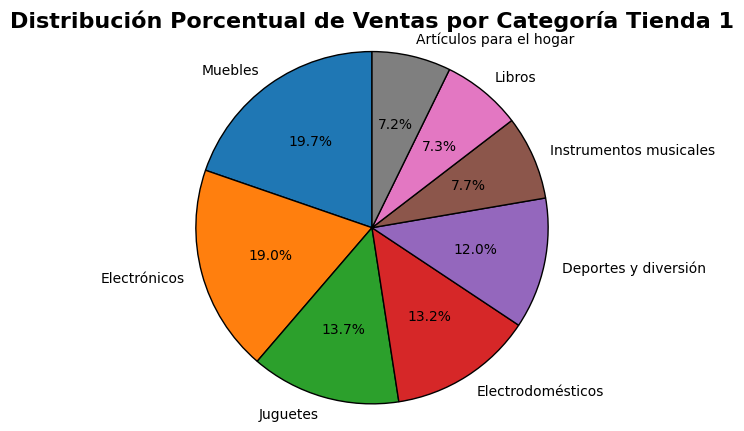

In [47]:
resultado_tienda = analizar_ventas_por_categori(tienda)
print("Resultados para Tienda 1:")
print(resultado_tienda)

grafico_ventas_por_categoria(resultado_tienda, "Tienda 1")

Resultados para Tienda 2:
    Categoría del Producto  Cantidad de Ventas
7                  Muebles                 442
3             Electrónicos                 422
5                 Juguetes                 313
2        Electrodomésticos                 305
1     Deportes y diversión                 275
4   Instrumentos musicales                 224
6                   Libros                 197
0  Artículos para el hogar                 181


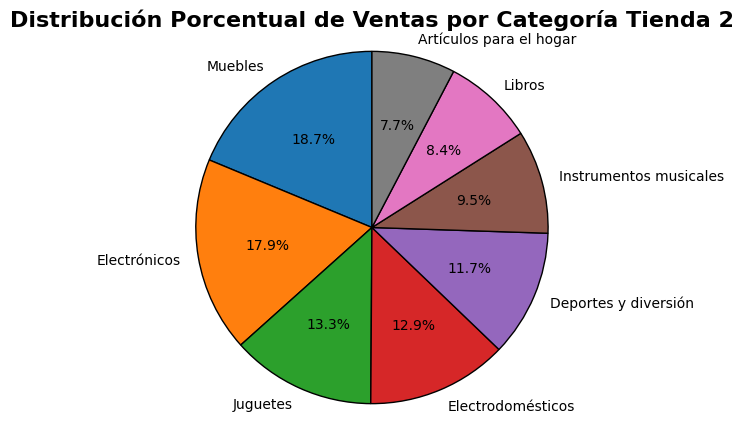

In [48]:
resultado_tienda2 = analizar_ventas_por_categori(tienda2)
print("Resultados para Tienda 2:")
print(resultado_tienda2)

grafico_ventas_por_categoria(resultado_tienda2, "Tienda 2")

Resultados para Tienda 3:
    Categoría del Producto  Cantidad de Ventas
7                  Muebles                 499
3             Electrónicos                 451
5                 Juguetes                 315
2        Electrodomésticos                 278
1     Deportes y diversión                 277
6                   Libros                 185
0  Artículos para el hogar                 177
4   Instrumentos musicales                 177


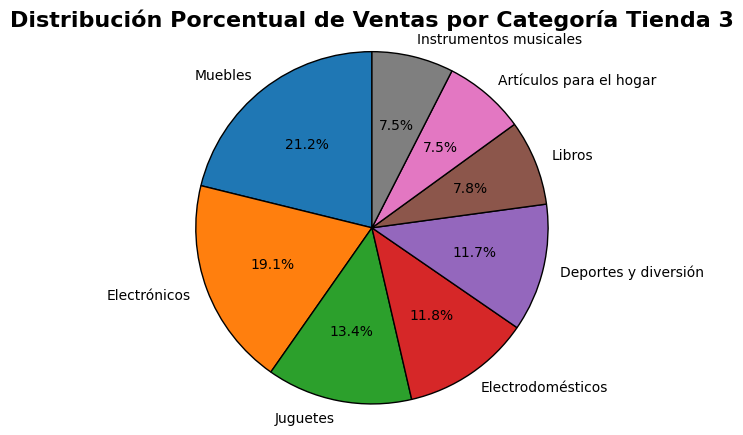

In [49]:
resultado_tienda3 = analizar_ventas_por_categori(tienda3)
print("Resultados para Tienda 3:")
print(resultado_tienda3)

grafico_ventas_por_categoria(resultado_tienda3, "Tienda 3")

Resultados para Tienda 4:
    Categoría del Producto  Cantidad de Ventas
7                  Muebles                 480
3             Electrónicos                 451
5                 Juguetes                 338
1     Deportes y diversión                 277
2        Electrodomésticos                 254
0  Artículos para el hogar                 201
6                   Libros                 187
4   Instrumentos musicales                 170


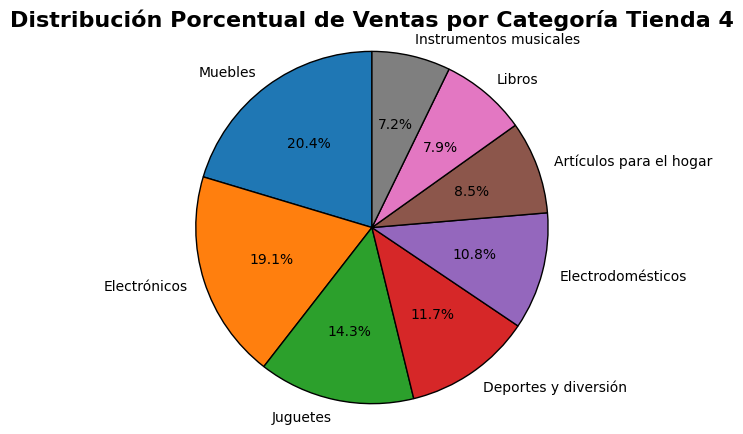

In [50]:
resultado_tienda4 = analizar_ventas_por_categori(tienda4)
print("Resultados para Tienda 4:")
print(resultado_tienda4)

grafico_ventas_por_categoria(resultado_tienda4, "Tienda 4")

# **3. Calificación promedio de la tienda**

In [51]:
calificacion_promedio_tienda = tienda['Calificación'].mean()
print(f"La calificación promedio de los clientes para esta tienda es: {calificacion_promedio_tienda:.2f}")

La calificación promedio de los clientes para esta tienda es: 3.98


In [52]:
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
print(f"La calificación promedio de los clientes para esta tienda es: {calificacion_promedio_tienda2:.2f}")

La calificación promedio de los clientes para esta tienda es: 4.04


In [53]:
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
print(f"La calificación promedio de los clientes para esta tienda es: {calificacion_promedio_tienda3:.2f}")

La calificación promedio de los clientes para esta tienda es: 4.05


In [54]:
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()
print(f"La calificación promedio de los clientes para esta tienda es: {calificacion_promedio_tienda4:.2f}")

La calificación promedio de los clientes para esta tienda es: 4.00


## **Analisis grafico de calificación promedio de las tiendas**

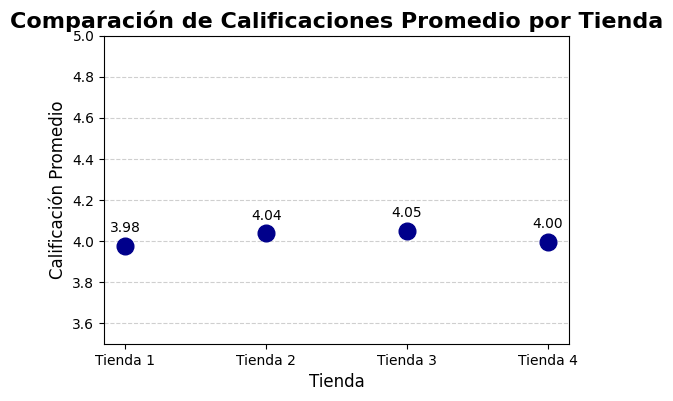

In [55]:
calificaciones = [
    calificacion_promedio_tienda,
    calificacion_promedio_tienda2,
    calificacion_promedio_tienda3,
    calificacion_promedio_tienda4
]

etiquetas_tiendas = [
    'Tienda 1',
    'Tienda 2',
    'Tienda 3',
    'Tienda 4'
]

plt.figure(figsize=(6, 4))

plt.plot(
    etiquetas_tiendas,
    calificaciones,
    marker='o',
    linestyle='None',
    markersize=12,
    color='darkblue'
)

plt.title('Comparación de Calificaciones Promedio por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)

for i, calificacion in enumerate(calificaciones):
    plt.annotate(
        f'{calificacion:.2f}',
        (etiquetas_tiendas[i], calificacion),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=10
    )

plt.ylim(3.5, 5.0)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# **4. Productos más y menos vendidos**

In [56]:
def productos_mas_vendidos (df, n_productos=5, titulo_tienda='Nombre de la tienda'):
  conteo_ventas = df['Producto'].value_counts().reset_index()
  conteo_ventas.columns = ['Nombre del Producto', 'Cantidad de Ventas']

  productos_mas_vendidos = conteo_ventas.sort_values(
        by='Cantidad de Ventas',
        ascending=False
    ).head(n_productos)

  print(f"\nProductos Más Vendidos en {titulo_tienda} (Top {n_productos}):")
  print(productos_mas_vendidos)

  plt.figure(figsize=(6, 3))
  sns.barplot(
        x='Nombre del Producto',
        y='Cantidad de Ventas',
        data=productos_mas_vendidos,
        palette='Blues_d',
        hue='Nombre del Producto',
        legend=False
    )
  plt.title(f'{titulo_tienda} - Top {n_productos} Productos Más Vendidos', fontsize=16)
  plt.xlabel('Nombre del Producto')
  plt.ylabel('Cantidad de Ventas')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

In [57]:
def productos_menos_vendidos(df, n_productos=5, titulo_tienda="Nombre de la tienda"):
  conteo_ventas = df['Producto'].value_counts().reset_index()
  conteo_ventas.columns = ['Nombre del Producto', 'Cantidad de Ventas']

  productos_menos_vendidos = conteo_ventas.sort_values(
        by='Cantidad de Ventas',
        ascending=True
    ).head(n_productos)

  print(f"\nProductos Menos Vendidos en {titulo_tienda} (Bottom {n_productos}):")
  print(productos_menos_vendidos)

  plt.figure(figsize=(6, 3))
  sns.barplot(
        x='Nombre del Producto',
        y='Cantidad de Ventas',
        data=productos_menos_vendidos,
        palette='Reds_d',
        hue='Nombre del Producto',
        legend=False
    )
  plt.title(f'{titulo_tienda} - Top {n_productos} Productos Menos Vendidos', fontsize=16)
  plt.xlabel('Nombre del Producto')
  plt.ylabel('Cantidad de Ventas')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

## **Productos mas y menos vendidos para tienda 1**


Productos Más Vendidos en Tienda 1 (Top 5):
  Nombre del Producto  Cantidad de Ventas
0          Microondas                  60
1       TV LED UHD 4K                  60
2             Armario                  60
3    Secadora de ropa                  58
4       Mesa de noche                  56


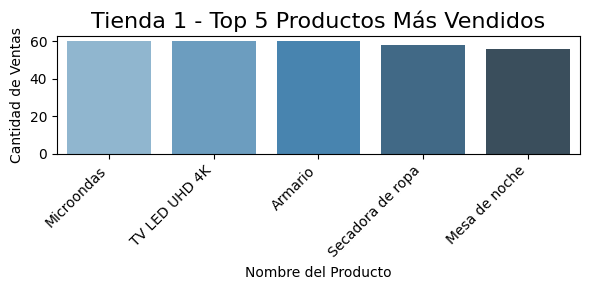

In [58]:
productos_mas_vendidos(tienda, n_productos=5, titulo_tienda='Tienda 1')


Productos Menos Vendidos en Tienda 1 (Bottom 5):
          Nombre del Producto  Cantidad de Ventas
49  Auriculares con micrófono                  33
50               Celular ABXY                  33
48            Olla de presión                  35
47                  Pandereta                  36
45                    Mochila                  39


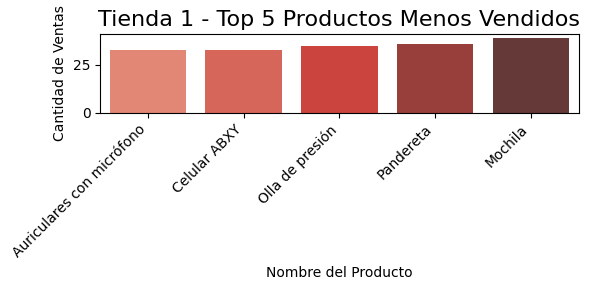

In [59]:
productos_menos_vendidos(tienda, n_productos=5, titulo_tienda='Tienda 1')

## **Productos mas y menos vendidos para tienda 2**


Productos Más Vendidos en Tienda 2 (Top 5):
         Nombre del Producto  Cantidad de Ventas
0  Iniciando en programación                  65
1                 Microondas                  62
2                    Batería                  61
3          Guitarra acústica                  58
4                  Pandereta                  58


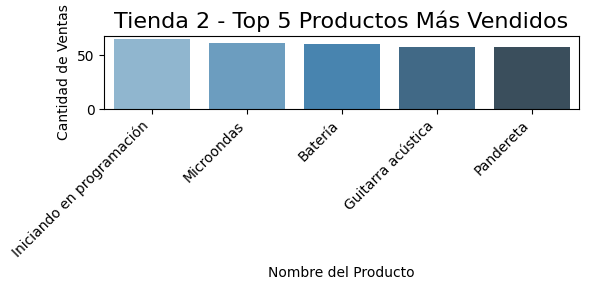

In [60]:
productos_mas_vendidos(tienda2, n_productos=5, titulo_tienda='Tienda 2')


Productos Menos Vendidos en Tienda 2 (Bottom 5):
   Nombre del Producto  Cantidad de Ventas
50       Juego de mesa                  32
48     Mesa de comedor                  34
49           Impresora                  34
47              Sillón                  35
46         Auriculares                  37


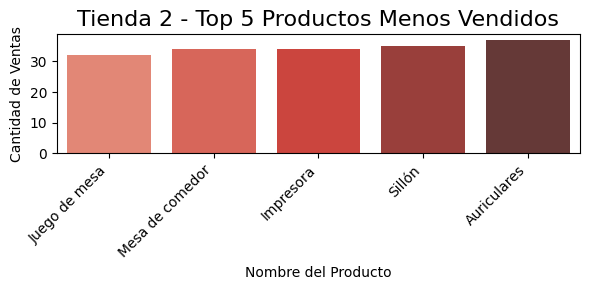

In [61]:
productos_menos_vendidos(tienda2, n_productos=5, titulo_tienda='Tienda 2')

## **Productos mas y menos vendidos para tienda 3**


Productos Más Vendidos en Tienda 3 (Top 5):
  Nombre del Producto  Cantidad de Ventas
0       Kit de bancas                  57
1     Mesa de comedor                  56
2           Cama king                  56
3        Set de ollas                  55
4       Mesa de noche                  55


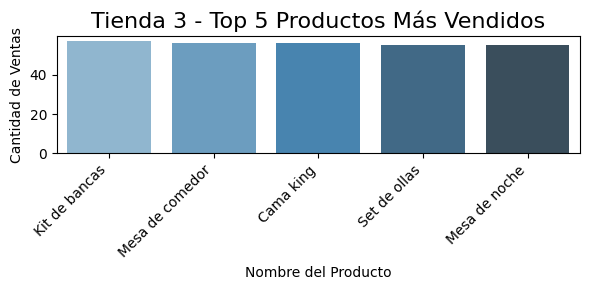

In [62]:
productos_mas_vendidos(tienda3, n_productos=5, titulo_tienda='Tienda 3')


Productos Menos Vendidos en Tienda 3 (Bottom 5):
        Nombre del Producto  Cantidad de Ventas
50  Bloques de construcción                  35
49               Microondas                  36
47             Set de vasos                  36
48                  Mochila                  36
45             Vaso térmico                  38


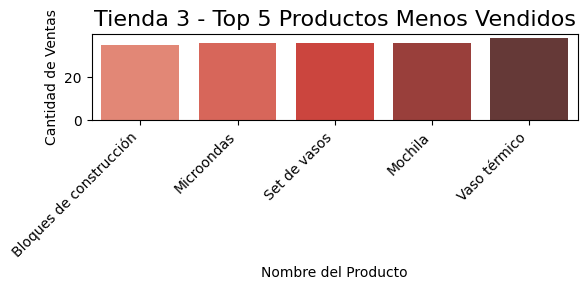

In [63]:
productos_menos_vendidos(tienda3, n_productos=5, titulo_tienda='Tienda 3')

## **Productos mas y menos vendidos en tienda 4**


Productos Más Vendidos en Tienda 4 (Top 5):
         Nombre del Producto  Cantidad de Ventas
0                   Cama box                  62
1                 Cubertería                  59
2    Dashboards con Power BI                  56
3                  Cama king                  56
4  Carrito de control remoto                  55


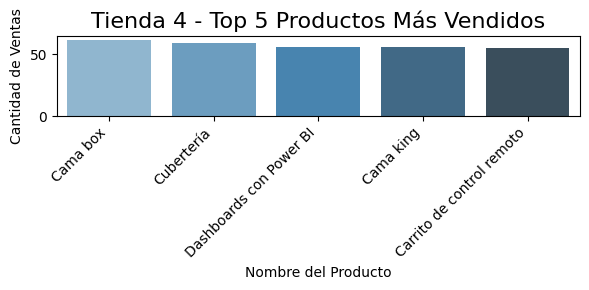

In [64]:
productos_mas_vendidos(tienda4, n_productos=5, titulo_tienda='Tienda 4')


Productos Menos Vendidos en Tienda 4 (Bottom 5):
            Nombre del Producto  Cantidad de Ventas
50           Guitarra eléctrica                  33
49                      Armario                  34
48            Guitarra acústica                  37
47  Ciencia de datos con Python                  38
45             Lavadora de ropa                  38


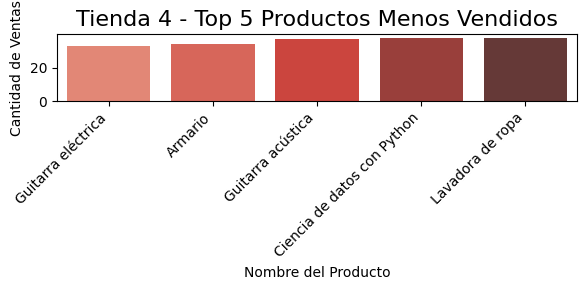

In [65]:
productos_menos_vendidos(tienda4, n_productos=5, titulo_tienda='Tienda 4')

# **5. Envío promedio por tienda**

In [66]:
def costo_envio_promedio(df):
  costo_promedio = df['Costo de envío'].mean()

  return costo_promedio

In [67]:
promedio_envio_tienda = costo_envio_promedio(tienda)
print(f"El Costo de Envío promedio para la tienda 1 es: {promedio_envio_tienda:.2f}")

El Costo de Envío promedio para la tienda 1 es: 26018.61


In [68]:
promedio_envio_tienda2 = costo_envio_promedio(tienda2)
print(f"El Costo de Envío promedio para la tienda 2 es: {promedio_envio_tienda2:.2f}")

El Costo de Envío promedio para la tienda 2 es: 25216.24


In [69]:
promedio_envio_tienda3 = costo_envio_promedio(tienda3)
print(f"El Costo de Envío promedio para la tienda 3 es: {promedio_envio_tienda3:.2f}")

El Costo de Envío promedio para la tienda 3 es: 24805.68


In [70]:
promedio_envio_tienda4 = costo_envio_promedio(tienda4)
print(f"El Costo de Envío promedio para la tienda 4 es: {promedio_envio_tienda4:.2f}")

El Costo de Envío promedio para la tienda 4 es: 23459.46


## **Analisis Grafico Envio Promedio por Tienda**

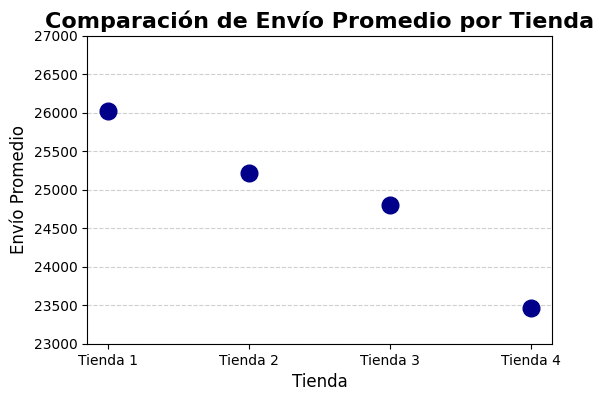

In [71]:
envios = [
    promedio_envio_tienda,
    promedio_envio_tienda2,
    promedio_envio_tienda3,
    promedio_envio_tienda4
]

etiquetas_tiendas = [
    'Tienda 1',
    'Tienda 2',
    'Tienda 3',
    'Tienda 4'
]

plt.figure(figsize=(6, 4))

plt.plot(
    etiquetas_tiendas,
    envios,
    marker='o',
    linestyle='None',
    markersize=12,
    color='darkblue'
)

plt.title('Comparación de Envío Promedio por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Envío Promedio', fontsize=12)

for i, calificacion in enumerate(calificaciones):
    plt.annotate(
        f'{calificacion:.2f}',
        (etiquetas_tiendas[i], calificacion),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=10
    )

plt.ylim(23000, 27000)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# **6. Informe Final**

Con base en el análisis de los gráficos y obtenidos por cada análisis individual se puede llegar a la conclusión de que la tienda que esta generando un mayor riesgo es la Tienda 1. A simple vista parece que es la tienda que tiene mayor rentabilidad, sin embargo, esta tienda es la que tiene un menor índice de aprobación por parte de los clientes con un 3.98 de calificación promedio en satisfacción. Esto se debe principalmente a su elevado costo en los envíos de los productos. Si bien la tienda numero cuatro presenta un menor monto en ventas, se ve compensado con su costo de envió el cual es el mas bajo de las cuatro tiendas y su calificación promedio de satisfacción esta por encima de la tienda uno. La tienda uno destaca en sus productos vendidos para las categorías de diversión y deportes, sin embargo, la baja calificación de la clientela la pone en riesgo de tener un gran inventario con poca lealtad, lo que significa que hay una gran inversión de capital en una tienda que no genera la satisfacción necesaria, lo que en el mercado se puede traducir en perdida de clientes potenciales a corto y largo plazo, lo cual la hace capitalmente ineficiente en términos de servicio. Si bien la tienda cuatro maneja un menor numero de ingresos mensuales el nivel de satisfacción y su costo promedio de envió mas bajo lo convierten en una mejor opción a largo plazo, realizando una correcta campaña de marketing o capacitación a sus empleados se puede ayudar a incrementar el interés de la comunidad en esta tienda, así como ayudar a subir sus ventas y si se continúa manejando el costo de envió promedio, seria mas rentable a largo plazo invertir en la tienda cuatro. Por tanto, es recomendable vender la tienda 1, ya que represente un mayor riesgo por la volatilidad de los clientes potenciales de la misma.